# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [5]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
#1)
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [7]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [8]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill + 1', data=tips).fit()

In [9]:
#2)
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.64e-20
Time:                        09:22:54   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o valor de P mostrado na tabela acima, os parâmetros sex, smoker e time apresentam um valor maior de 5% mostrando suas não relevancia com relação a variável resposta que estamos trabalhando

In [11]:
y, X = patsy.dmatrices('tip ~ net_bill + 1', data=tips)

In [12]:
reg = smf.ols('tip ~ net_bill + 1', data=tips).fit()
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           5.02e-23
Time:                        09:22:54   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill', 'res'],
      dtype='object')

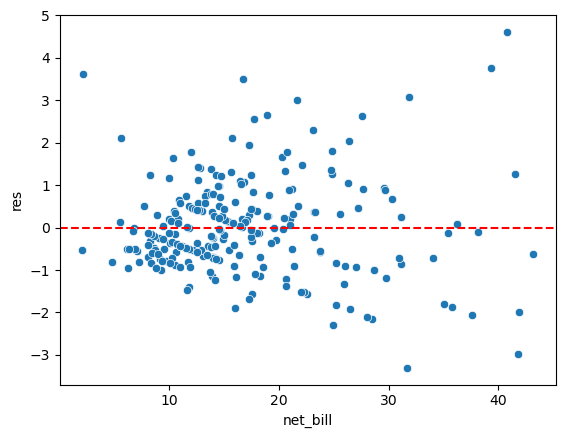

In [14]:
#3) 
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.40e-20
Time:                        09:22:54   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

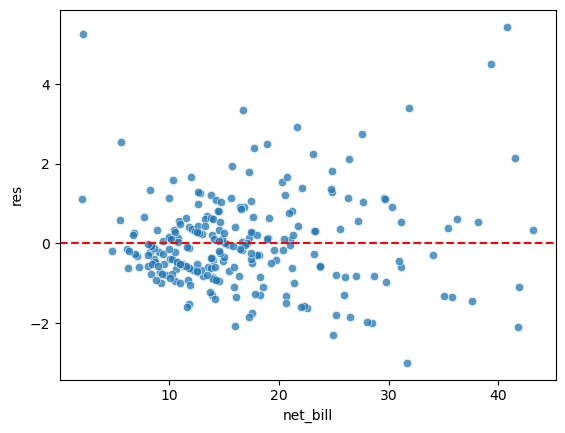

In [15]:
#4)
reg = smf.ols('y ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.96e-22
Time:                        09:22:55   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

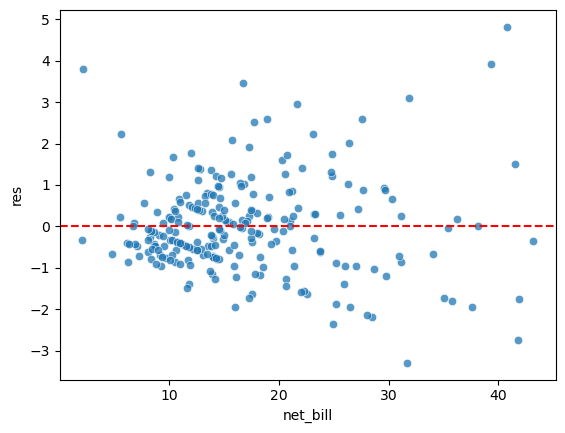

In [16]:
reg = smf.ols('y ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#4)Polinomio é melhor por conta do valor do r² e r² ajustado serem maiores

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [19]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [20]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [21]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill + 1', data=tips).fit()

In [22]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.21e-18
Time:                        09:22:55   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2)
Analisando o valor de P mostrado na tabela acima, os parâmetros sex, smoker e time apresentam um valor maior de 5% mostrando suas não relevancia com relação a variável resposta que estamos trabalhando

In [24]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill + 1', data=tips)

In [25]:
reg = smf.ols('np.log(tip) ~ net_bill + 1', data=tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.60e-21
Time:                        09:22:55   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

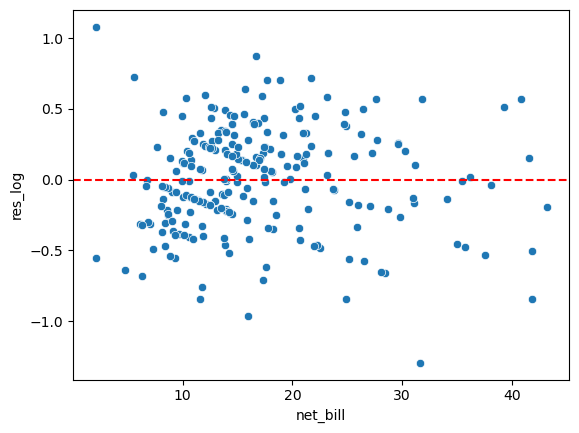

In [26]:
#3) 
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           5.62e-22
Time:                        09:22:55   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

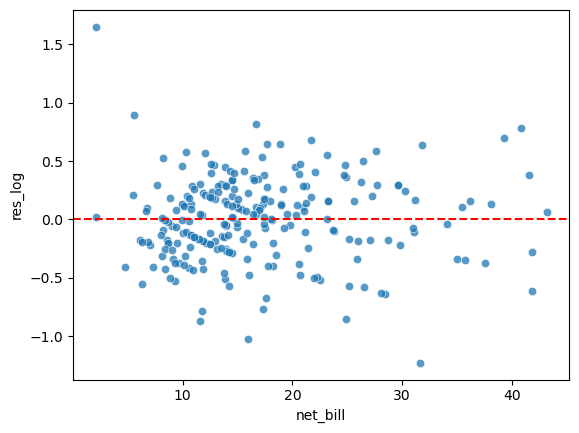

In [27]:
#4)
reg = smf.ols('y ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res_log'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.82e-22
Time:                        09:22:55   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

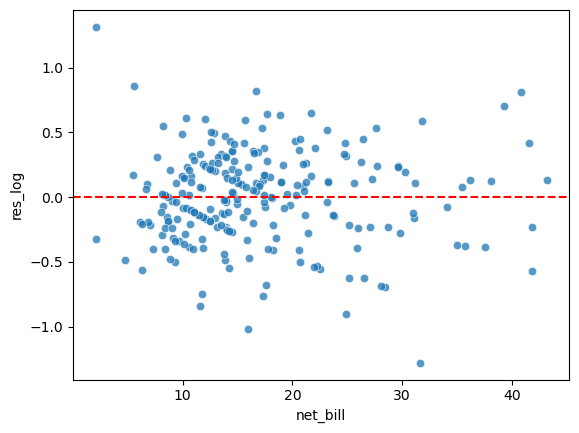

In [28]:
reg = smf.ols('y ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res_log'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Polinomio é melhor por conta do valor do r² e r² ajustado serem maiores

In [30]:
#5)
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip']].corr().iloc[0,1]

r**2

0.3197192113607728

O modelo da questão um apresenta um R² de 33,5% enquanto esse último modelo apresenta um R² de 31,9%, com isso o melhor modelo para analisar as relações entre as variaveis é o modelo um.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [33]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [35]:
# Completando a coluna tempo_emprego com a média dos valores da coluna
valor_media = df['tempo_emprego'].mean()
df['tempo_emprego'].fillna(valor_media, inplace=True)

C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_13840\2618388757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(valor_media, inplace=True)


In [36]:
#1)
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2483.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:55   Log-Likelihood:            -1.5543e+05
No. Observations:               15000   AIC:                         3.109e+05
Df Residuals:                   14998   BIC:                         3.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1758.6514    100.786     17.449      0.000    1561.098    1956.204
tempo_emprego   510.0119     10.236     49.826      0.000     489.948     530.076
==============================================================================
Omnibus:                    21090.338   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11416581.206
Skew:                           8.061   Prob(JB):                         0.00
Kurtosis:                     137.189   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

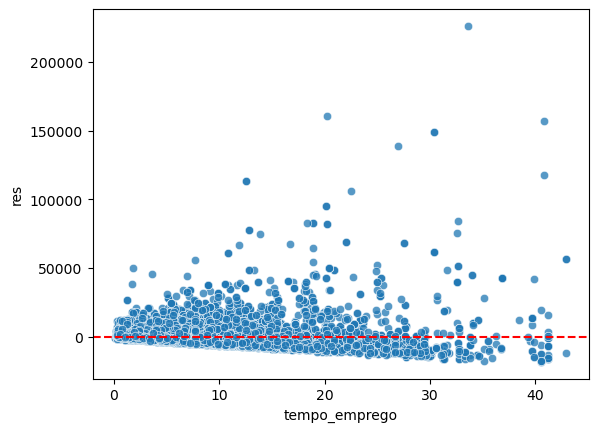

In [37]:
#2)
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1211.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          3.44e-255
Time:                        09:22:55   Log-Likelihood:            -1.5600e+05
No. Observations:               15000   AIC:                         3.120e+05
Df Residuals:                   14998   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1527.22

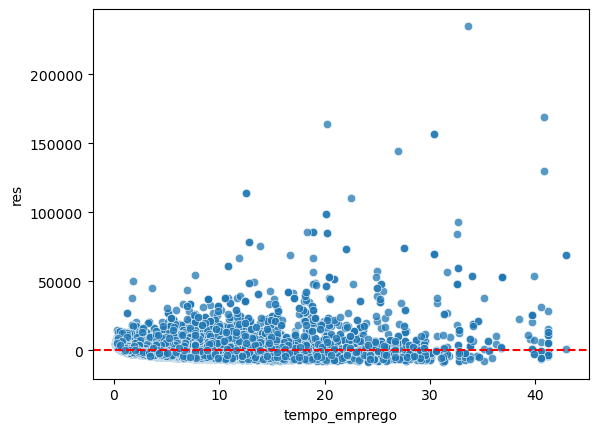

In [38]:
reg = smf.ols('renda ~ np.log(tempo_emprego)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2583.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:55   Log-Likelihood:                -18233.
No. Observations:               15000   AIC:                         3.647e+04
Df Residuals:                   14998   BIC:                         3.648e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7802      0.011    724.427

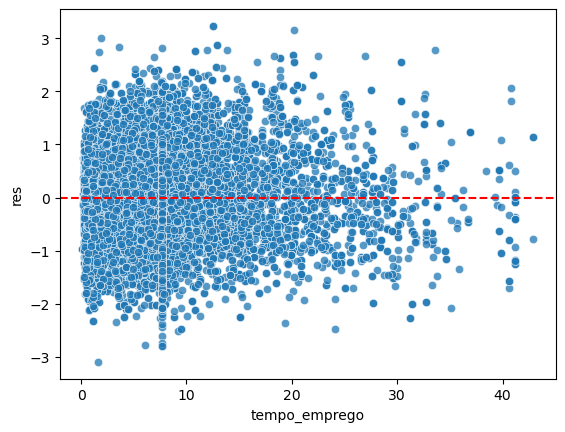

In [39]:
reg = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1726.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:56   Log-Likelihood:                -18608.
No. Observations:               15000   AIC:                         3.722e+04
Df Residuals:                   14998   BIC:                         3.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.68

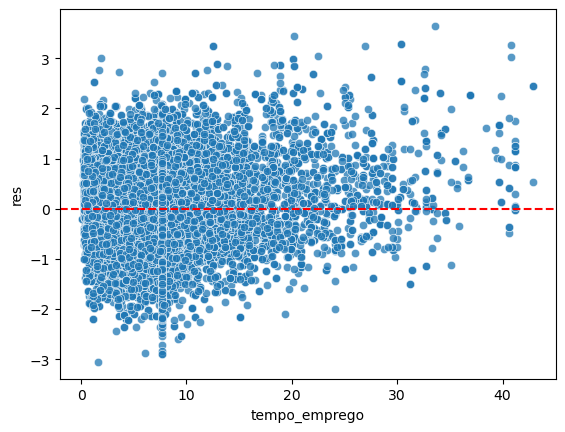

In [40]:
reg = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [41]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data = df).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:56   Log-Likelihood:            -1.5537e+05
No. Observations:               15000   AIC:                         3.107e+05
Df Residuals:                   14997   BIC:                         3.108e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [42]:
reg = smf.ols('np.power(renda,2) ~ tempo_emprego', data = df).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     617.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.23e-133
Time:                        09:22:56   Log-Likelihood:            -3.2959e+05
No. Observations:               15000   AIC:                         6.592e+05
Df Residuals:                   14998   BIC:                         6.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.158e+08   1.11e+07    -10.419

In [43]:
reg = smf.ols('np.power(renda,2) ~ tempo_emprego + np.power(tempo_emprego,2)', data = df).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.38e-181
Time:                        09:22:56   Log-Likelihood:            -3.2948e+05
No. Observations:               15000   AIC:                         6.590e+05
Df Residuals:                   14997   BIC:                         6.590e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Como o gráfico de resíduos apresentou um formato de cone, isso indica um problema de heterocedasticidade, para tentar resolver esse problema, utilizei as tecnicas de transformação Logarítmica e polinômiais, o melhor resultado se apresentou na transformação da variável independente tempo_emprego em polinômio de 2° grau, apresentando um R² de 15%.

In [47]:
y, X = patsy.dmatrices('renda ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + 0', df)
X

DesignMatrix with shape (15000, 25)
  Columns:
    ['C(sexo)[F]',
     'C(sexo)[M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'C(tipo_renda)[T.Bolsista]',
     'C(tipo_renda)[T.Empresário]',
     'C(tipo_renda)[T.Pensionista]',
     'C(tipo_renda)[T.Servidor público]',
     'C(educacao)[T.Pós graduação]',
     'C(educacao)[T.Secundário]',
     'C(educacao)[T.Superior completo]',
     'C(educacao)[T.Superior incompleto]',
     'C(estado_civil)[T.Separado]',
     'C(estado_civil)[T.Solteiro]',
     'C(estado_civil)[T.União]',
     'C(estado_civil)[T.Viúvo]',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'C(sexo)' (columns 0:2)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'C(tipo_renda)

In [48]:
y

DesignMatrix with shape (15000, 1)
     renda
   8060.34
   1852.15
   2253.89
   6600.77
   6475.97
   1445.87
   1726.03
   2515.98
   3420.34
  12939.14
   6402.41
   1685.51
   6343.52
    581.18
  25359.65
   1171.49
   3675.33
  19763.27
  13678.63
   5287.82
  26174.03
   1649.37
   4715.57
    799.18
   8264.29
   3313.32
   4016.38
   4655.96
   5611.78
    379.52
  [14970 rows omitted]
  Terms:
    'renda' (column 0)
  (to view full data, use np.asarray(this_obj))

In [49]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:56   Log-Likelihood:            -1.5430e+05
No. Observations:               15000   AIC:                         3.087e+05
Df Residuals:                   14975   BIC:                         3.088e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(sexo)[F]                          -4855.7784   2229.021     -2.178      0.029   -9224.933    -486.624
C(sexo)[M]                           1026.9425   2226.024      0.461      0.645   -3336.337    5390.222
posse_de_veiculo[T.True]                6.9301    129.822      0.053      0.957    -247.536     261.397
posse_de_imovel[T.True]               384.2523    127.939      3.003      0.003     133.476     635.029
C(tipo_renda)[T.Bolsista]           -1426.4457   2374.009     -0.601      0.548   -6079.794    3226.903
C(tipo_renda)[T.Empresário]           810.3131    146.858      5.518      0.000     522.453    1098.174
C(tipo_renda)[T.Pensionista]        -1543.5859    208.452     -7.405      0.000   -1952.177   -1134.995
C(tipo_renda)[T.Servidor público]     121.7341    218.561      0.557      0.578    -306.672     550.140
C(educacao)[T.Pós graduação]          632.0570   1503.957      0.420      0.674   -2315.883    3579.997
C(educacao)[T.Secundário]             156.9061    560.385      0.280      0.779    -941.518    1255.330
C(educacao)[T.Superior completo]      791.1039    564.842      1.401      0.161    -316.055    1898.263
C(educacao)[T.Superior incompleto]   -220.1847    631.801     -0.349      0.727   -1458.593    1018.223
C(estado_civil)[T.Separado]           982.5989   1067.650      0.920      0.357   -1110.126    3075.324
C(estado_civil)[T.Solteiro]           747.7260   1047.098      0.714      0.475   -1304.714    2800.166
C(estado_civil)[T.União]             -494.4589    228.914     -2.160      0.031    -943.158     -45.759
C(estado_civil)[T.Viúvo]              981.1301   1077.536      0.911      0.363   -1130.973    3093.233
C(tipo_residencia)[T.Casa]           -207.0217    517.485     -0.400      0.689   -1221.355     807.312
C(tipo_residencia)[T.Com os pais]    -289.0389    580.722     -0.498      0.619   -1427.326     849.248
C(tipo_residencia)[T.Comunitário]    -414.2394   1028.970     -0.403      0.687   -2431.147    1602.668
C(tipo_residencia)[T.Estúdio]         188.5034    935.277      0.202      0.840   -1644.753    2021.760
C(tipo_residencia)[T.Governamental]   364.1943    614.576      0.593      0.553    -840.451    1568.839
qtd_filhos                          -1014.1330   1040.042     -0.975      0.330   -3052.743    1024.477
idade                                  39.7026      7.563      5.250      0.000      24.879      54.527
tempo_emprego                         553.8457     10.182     54.394      0.000     533.887     573.804
qt_pessoas_residencia                1145.0483   1038.107      1.103      0.270    -889.768    3179.865
==============================================================================
Omnibus:                    21865.400   Durbin-Watson:                   2.022
Prob(Omnibus)

In [96]:
#4)
y, X = patsy.dmatrices('renda ~ C(sexo) + posse_de_imovel + idade + tempo_emprego + 0', df)
X

DesignMatrix with shape (15000, 5)
  C(sexo)[F]  C(sexo)[M]  posse_de_imovel[T.True]  idade  tempo_emprego
           1           0                        1     26        6.60274
           0           1                        1     28        7.18356
           1           0                        1     35        0.83836
           1           0                        1     30        4.84658
           0           1                        0     33        4.29315
           1           0                        1     39        4.34521
           1           0                        1     55        6.37808
           1           0                        1     36        3.10411
           1           0                        1     50       18.60548
           0           1                        1     60       10.55890
           0           1                        0     39        2.08767
           1           0                        1     65        7.72263
           1           0     

In [98]:
y

DesignMatrix with shape (15000, 1)
     renda
   8060.34
   1852.15
   2253.89
   6600.77
   6475.97
   1445.87
   1726.03
   2515.98
   3420.34
  12939.14
   6402.41
   1685.51
   6343.52
    581.18
  25359.65
   1171.49
   3675.33
  19763.27
  13678.63
   5287.82
  26174.03
   1649.37
   4715.57
    799.18
   8264.29
   3313.32
   4016.38
   4655.96
   5611.78
    379.52
  [14970 rows omitted]
  Terms:
    'renda' (column 0)
  (to view full data, use np.asarray(this_obj))

In [100]:
# Ajustando o modelo
modelo_1 = sm.OLS(y,X).fit()

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1279.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:24:35   Log-Likelihood:            -1.5438e+05
No. Observations:               15000   AIC:                         3.088e+05
Df Residuals:                   14995   BIC:                         3.088e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(sexo)[F]               -678.9045    260.169     -2.609      0.009   -1188.868    -168.940
C(sexo)[M]               5268.7111    242.936     21.688      0.000    4792.527    5744.895
posse_de_imovel[T.True]   373.1727    125.930      2.963      0.003     126.335     620.010
idade                      -4.6006      5.497     -0.837      0.403     -15.376       6.174
tempo_emprego             568.5087      9.871     57.596      0.000     549.161     587.856
==============================================================================
Omnibus:                    21779.578   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14927962.840
Skew:                           8.508   Prob(JB):                         0.00
Kurtosis:                     156.607   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o R² do modelo com todas as variávei, ele apresentou um valor de 26% de explicação da variável resposta em relação às variáveis independentes, quando é feito o filtro colocando apenas as variáveis com real significancia entre elas, a porcentagem do R² vai para 25% mostrando realmente quais são as variáveis que mais se relacionam e interferem na variável resposta.

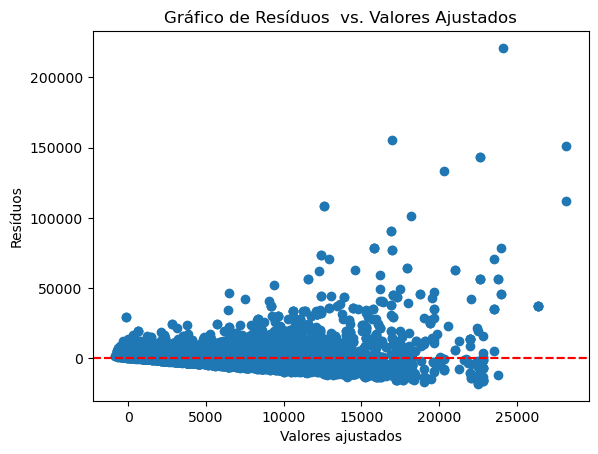

In [129]:
# Obtendo os resíduos
res_1 = modelo_1.resid

# Gráfico de resíduos vs. valores ajustados
plt.scatter(modelo_1.fittedvalues, res_1)
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos  vs. Valores Ajustados")
plt.axhline(y=0, color='r', linestyle='--')
plt.show() 

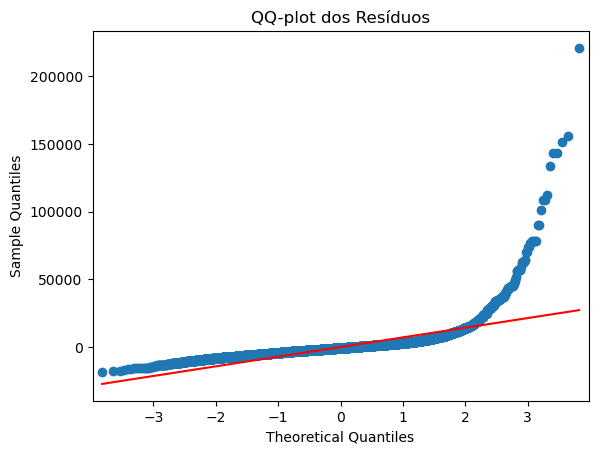

In [111]:
# QQ-plot
sm.qqplot(res_, line='s')
plt.title("QQ-plot dos Resíduos")
plt.show()

In [113]:
# Criando um novo modelo com a variável resposta na base logarítmica
y, X = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_imovel + idade + tempo_emprego + 0', df)

In [117]:
modelo_2 = sm.OLS(y,X).fit()

modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1851.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:52:45   Log-Likelihood:                -16415.
No. Observations:               15000   AIC:                         3.284e+04
Df Residuals:                   14995   BIC:                         3.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(sexo)[F]                  7.4537      0.026    282.942      0.000       7.402       7.505
C(sexo)[M]                  8.2614      0.025    335.849      0.000       8.213       8.310
posse_de_imovel[T.True]     0.0904      0.013      7.091      0.000       0.065       0.115
idade                      -0.0014      0.001     -2.513      0.012      -0.002      -0.000
tempo_emprego               0.0637      0.001     63.737      0.000       0.062       0.066
==============================================================================
Omnibus:                        1.627   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.599
Skew:                           0.018   Prob(JB):                        0.450
Kurtosis:                       3.035   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
res_2 = modelo_2.resid

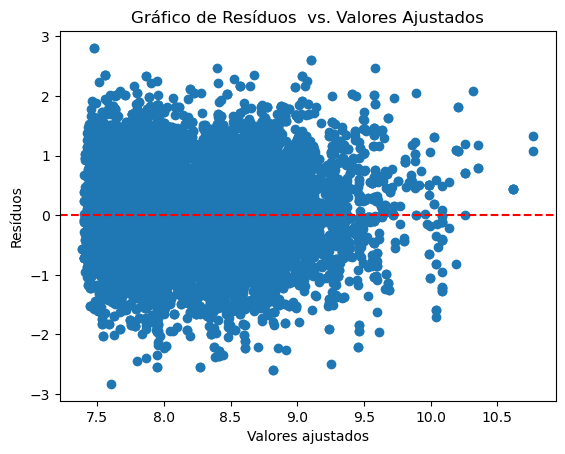

In [131]:
plt.scatter(modelo_2.fittedvalues, res_2)
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos  vs. Valores Ajustados")
plt.axhline(y=0, color='r', linestyle='--')
plt.show() 

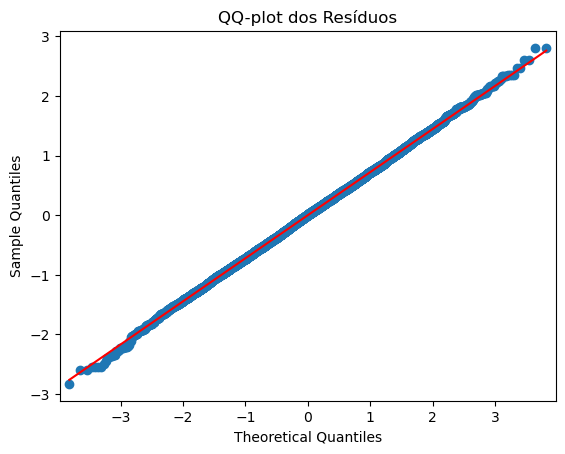

In [123]:
# QQ-plot
sm.qqplot(res_2, line='s')
plt.title("QQ-plot dos Resíduos")
plt.show()

In [140]:
df['res_2'] = res_2

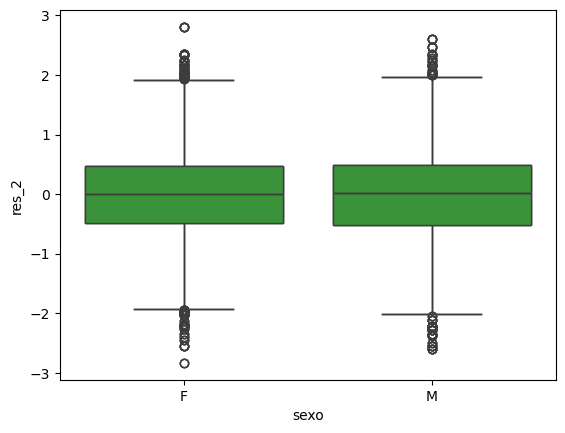

In [162]:
sns.boxplot(x = 'sexo', y = 'res_2', data = df)
plt.show()

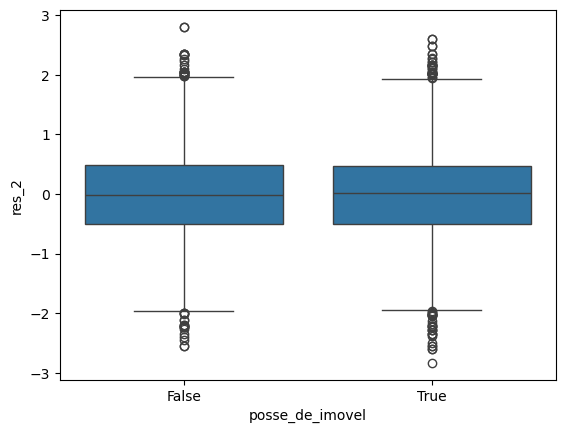

In [164]:
sns.boxplot(x = 'posse_de_imovel', y = 'res_2', data = df)
plt.show()

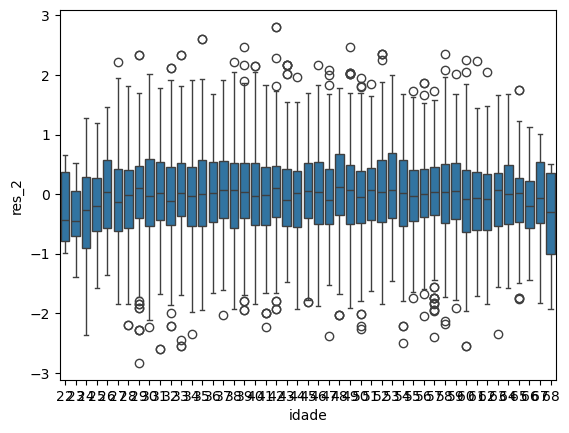

In [166]:
sns.boxplot(x = 'idade', y = 'res_2', data = df)
plt.show()

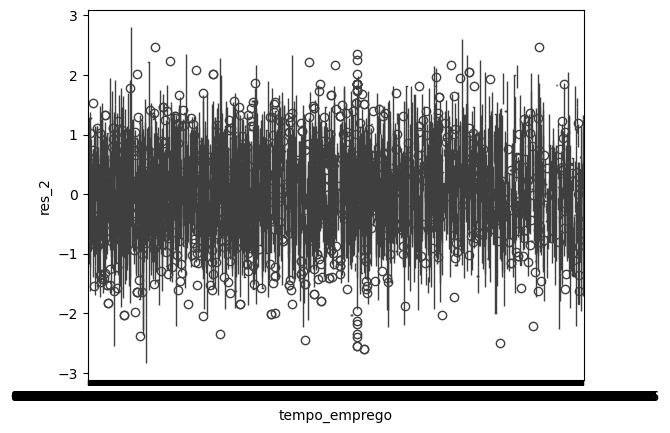

In [170]:
sns.boxplot(x = 'tempo_emprego', y = 'res_2', data = df)
plt.show()

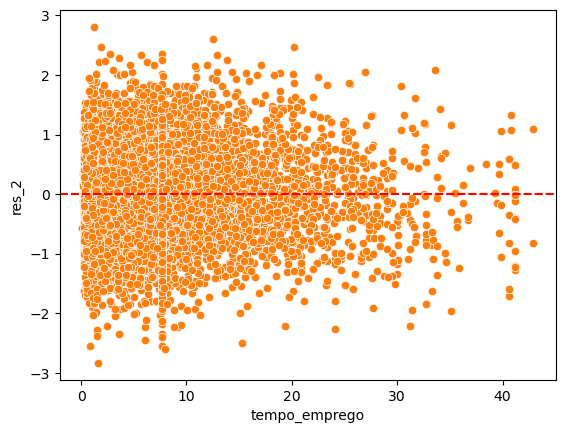

In [176]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_2', data = df)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Com o ajuste da variável resposta, o modelo conseguiu explicar 33% da relação entre as variáveis independentes e a variável resposta buscada pela análise.